In [1]:
import numpy as np
from dimer_gutzwiller_mc import DimerGutzwillerMCParameters
import matplotlib.pyplot as plt
import dimer_gutzwiller_mc_config as c
from pickle import load

In [2]:
sim_list = [DimerGutzwillerMCParameters(c.omega_S,
                                            lmbd_1,
                                            lmbd_2,
                                            c.walk_pos0,
                                            c.dt,
                                            c.T,
                                            c.nwalk)
                for lmbd_1, lmbd_2 in c.lambdas]

In [3]:
walk_positions = []

for sim in sim_list:
    f = open(f"data/{str(sim)}.pkl", "rb")
    data = load(f)
    f.close()
    walk_positions.append(data[1])

walk_positions = np.array(walk_positions)

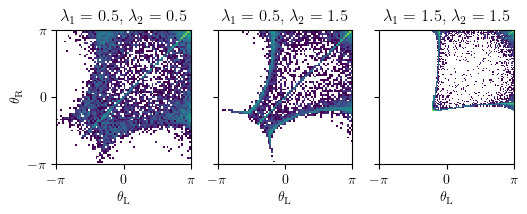

In [4]:
plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_grid_1x3.mplstyle"])

bins = 72
ticks = np.linspace(-np.pi, np.pi, 3)
tick_labels = [r"$-\pi$", r"$0$", r"$\pi$"]

fig, axs = plt.subplots(1, 3)
for i, sim in enumerate(sim_list):

    
    axs[i].hist2d(walk_positions[i][:, 0], walk_positions[i][:, 1],
                  bins=bins,
                  norm="log")
    axs[i].set_xticks(ticks)
    axs[i].set_xticklabels(tick_labels)
    axs[i].set_yticks(ticks)
    axs[i].set_yticklabels(tick_labels)
    axs[i].set_title(rf"$\lambda_1 = {sim.lmbd_1}$, $\lambda_2 = {sim.lmbd_2}$")
    axs[i].set(xlabel=r"$\theta_\mathrm{L}$", ylabel=r"$\theta_\mathrm{R}$")
    axs[i].set(aspect='equal')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# plt.savefig("plots/dimer-gutzwiller-mc.pdf")